# Into to sklearn 
Implementing a Machine Learning algorithm

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("data/titanic.csv")

Let's take a look at our data to see what needs to be manuplated to work with our machine learning algorithm

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note that we have a mix of categorical features (Sex, Cabin, Embarked) and conintous numeric feautes (Age, Fare). Machine learning algorithms need their inputs to be in some kind of numeric format. Therefore, we must transform our catgorical features into a usable numeric format. 

In [5]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ) # Convert from string to binary value


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Let's take a look at our data to see if we have any missing fields

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


From above we are missing values in the `Age`. How should we fill in the missing values? Should we remove the data point all together?

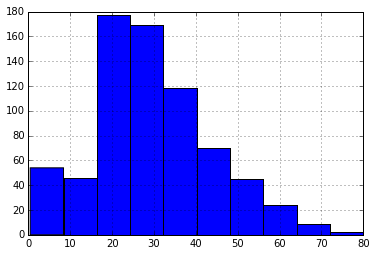

In [8]:
df['Age'].hist()

Let's try to set each `null` field in the `Age` column to the ___ age of all the passengers

In [9]:
df[ df['Age'].isnull()]['Age'] = df['Age'].mean()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


Whoah, what happened? Turns out we modified a *copy* of the dataframe.

In [11]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean() 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


Ahh, that feels better. But we're not quite done yet. We still have some categorical data that cannot be used in our machine learning algorithms.To solve this, we will use 'dummy variables'. These variables take on a binary values, splitting the number of categories into as many columns.

In [13]:
dummies = pd.get_dummies(df['Embarked'])
dummies.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [14]:
df = pd.concat([df, dummies], axis=1) # Let's add our dummies dataframe to our existed dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


But wait! What happened to the two missing values in our `Embarked` column? It turns out that pandas is smart enough to convert null values to 0s when we transformed our features.

In [15]:
df[(df['Q']==0) & (df['C']==0) & (df['S']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,0.0,0.0,0.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,0.0,0.0,0.0


Let's save our data to a csv so we don't have to clean it up each time we want to run a new machine learning experiment.

In [17]:
df.to_csv('data/data.cleaned.csv')


Let's convert our pandas objects into the final form before they can be used with sklearn. Sklearn takes only numpy arrays as inputs for both features and labels. This is an easy conversion in Pandas

In [18]:
labels = df['Survived'].values

In [19]:
features = df[['Pclass', 'Sex', 'Age','Fare','SibSp','Parch', 'C','Q','S']].values

# Finally, machine learning ...

In [20]:
clf = KNeighborsClassifier() # create a classifier 

In [21]:
clf.fit(features,labels) # train the classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
pred = clf.predict(features) # make predictions

In [23]:
accuracy_score(pred,labels) # test

0.80920314253647585

That's all folks